<h2 align = "right"> Felix Filipi</h2>
<h3 align = "right"> 2301877590 </h3>

<h1 align = "center"> Computer Vision</h1>
<h2 align = "center"> Corner detection </h2>

# Harris corner detector

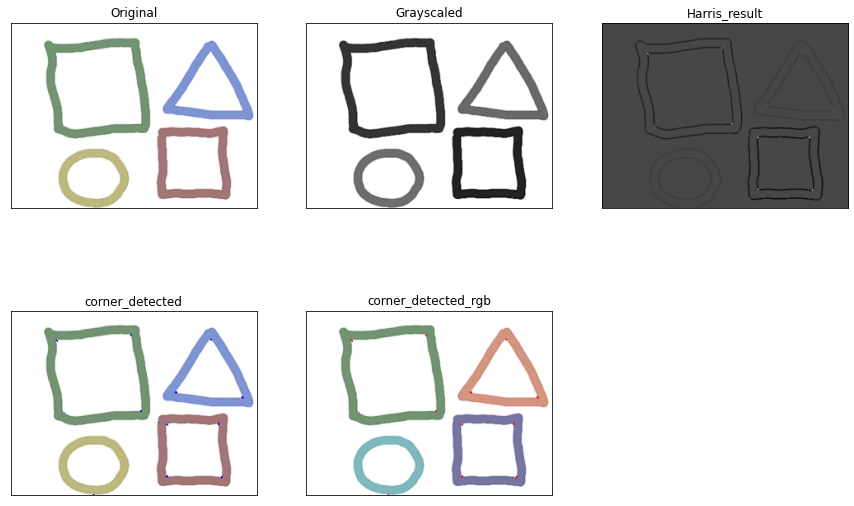

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img = cv2.imread('shape.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

harris_result = cv2.cornerHarris(gray, 2, 3, 0.04)#src, blockSize (neighbor size), ksize, k (konstanta)

harris_img_res = img.copy()
harris_img_res[harris_result > 0.01 * harris_result.max()] = [0,0,255]

harris_img_res_rgb = cv2.cvtColor(harris_img_res, cv2.COLOR_BGR2RGB)

image_list = [img,gray,harris_result, harris_img_res,harris_img_res_rgb]
image_title = ['Original','Grayscaled','Harris_result','corner_detected','corner_detected_rgb']

plt.figure(figsize=(15,15))
for i in range(len(image_list)):
    plt.subplot(3,3,(i+1))
    plt.title(image_title[i])
    plt.imshow(image_list[i],cmap='gray')
    plt.yticks([]),plt.xticks([])

# With subpix as corner detection we can normalize the result

As example, here's in the above picture, the images return corner of the image not in a proper form. Its return 5 or more pixel as its corner. So, here subpix appear in order to solve this problem, subpix will generate less pixel to generate the picture edge

So, here's some step to implement subpix:
1. We need to do threshold
2. Find the centroids
3. Find criteria (Work as filters/criteria/conditions for corner detection)
4. Find its corners
5. Mark the corners

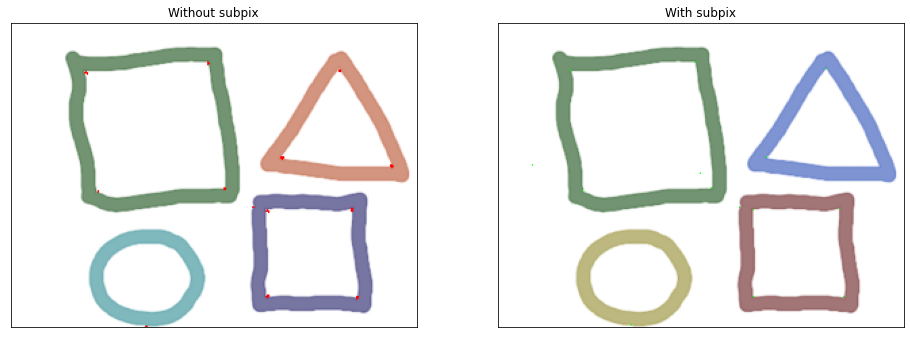

In [2]:
#try implement subpix

#Do thresholding
_, thresh = cv2.threshold(harris_result, 0.01 * harris_result.max(), 255, cv2.THRESH_BINARY)
thresh = np.uint8(thresh)

#Find its centroids (Middle pixel of the corner)
_, _, _, centroids = cv2.connectedComponentsWithStats(thresh)
centroids = np.float32(centroids)

#Find its criteria / conditions
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 100, 0.001)

#Find the corner
corners = cv2.cornerSubPix(gray, centroids, (5,5), (-1,-1), criteria)
#winsize (work with winsize*2 + 1, as example 5, return 11)

with_subpix_img = img.copy()
corners = np.uint8(corners)
for corner in corners:
    corner_y = corner[1]
    corner_x = corner[0]
    
    with_subpix_img[corner_y, corner_x] = [0,255,0] #color the corner

vis_images = [harris_img_res_rgb, with_subpix_img]
vis_title = ['Without subpix', 'With subpix']

plt.figure(figsize=(16,16))
for i in range(len(vis_images)):
    plt.subplot(1,2,i+1)
    plt.imshow(vis_images[i])
    plt.title(vis_title[i])
    plt.xticks([]),plt.yticks([])

# Fast Feature Detector & Orb Feature Detector

Similar, but different algorithm, fast feature detector return richer corner detection, meanwhile orb detection return better result (smooth) as its corner detection.


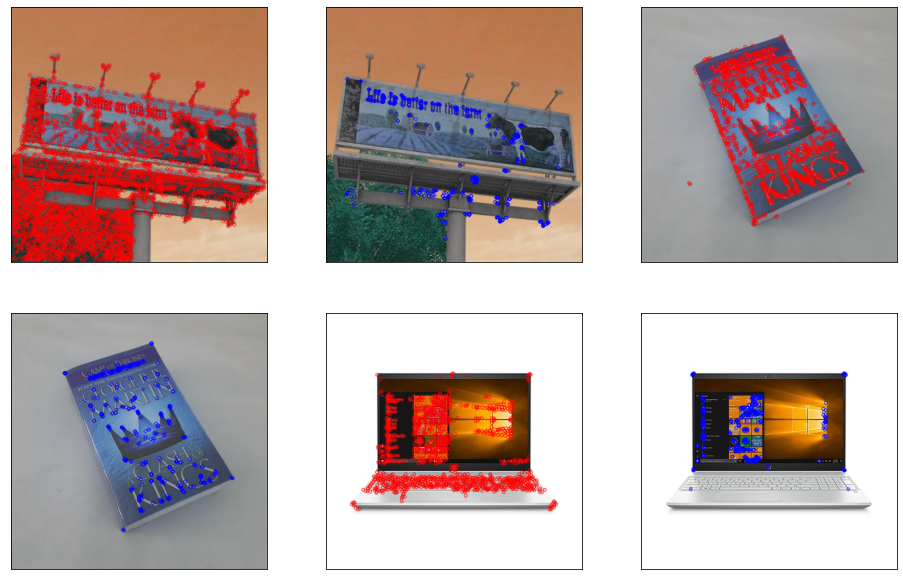

In [3]:
root_path = 'images'

images= []
for img_name in os.listdir(root_path):
    
    #equal to os.path.join(root_path, img_name)
    img_paths = root_path + '/' + img_name 
    img = cv2.imread(img_paths)
    fast = cv2.FastFeatureDetector_create() #Simply call the class
    keypoints = fast.detect(img, None) #Simply call the function

    #fast corner detector
    fast_img = img.copy()
    fast_img = cv2.cvtColor(fast_img, cv2.COLOR_BGR2RGB)
    cv2.drawKeypoints(img, keypoints, fast_img, color = [255,0,0]) #draw the corner
    images.append(fast_img)
    #fast_image = edited image, img = anchor
    
    #orb    
    orb = cv2.ORB_create() #simply call the class
    keypoints = orb.detect(img, None) #call the function
    
    orb_img = img.copy()
    cv2.drawKeypoints(img, keypoints, orb_img, color = [0,0,255]) #draw the corner
    images.append(orb_img)

plt.figure(figsize=(16,16))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.xticks([]),plt.yticks([])